[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rehan-ul-haq/langGraph_yt/blob/master/02_langGraph_router/02_LangGraph_Router.ipynb)


# **LangGraph: Class-02**

In [ ]:
%%capture --no-stderr
%pip install -qU langchain langchain-google-genai langgraph

## **1. Structuring Prompts**
### **Messages**
In a typical chat-like interaction with Chat models (recent language models), the conversation has a flow, with alternating messages for the system, and from the user and the AI.

In LangChain v0.3, the classes `AIMessage`, `HumanMessage`, `SystemMessage` and `ToolMessage` are part of the message-based interface used when interacting with ChatModels (like OpenAI's GPT). These classes help structure the communication between a human user, the AI model, and the system, enabling more complex and nuanced conversations. Here's an overview of each:
1. **HumanMessage**
- **Purpose:** Represents a message that comes from the human user. It helps the AI model understand that the input is coming directly from the user, which can guide the model's response to be more human-centric.

2. **AIMessage**
- **Purpose:** Represents a message generated by the AI model (e.g., the response the model produces). This type of message denotes that the response comes from the AI and helps track the flow of conversation from the model's side.

3. **SystemMessage**
- **Purpose:** A message that contains system-level instructions or context, often used to define the behavior or identity of the AI model (e.g., "You are a helpful assistant"). It sets the context for the conversation and can be used to control the tone, style, or behavior of the AI model by providing instructions or constraints that affect how the model responds.

4. **ToolMessage**
- **Purpose:** This represents the result of a function call (Tool Call). In addition to role and content, this message has a name parameter which conveys the name of the function that was called to produce this result.

content - content of the message
name - optionally, a message author
response_metadata - optionally, a dict of metadata (e.g., often populated by model provider for AIMessages)

#### **Common Properties:**

role, content, name and response_metadata

In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage, ToolMessage

system_message = SystemMessage(role='system', content='You are a helpful assistant', name='system')
human_message = HumanMessage(role='human', content='Hello, how are you?', name='human')
ai_message = AIMessage(role='ai', content='I am doing great, how can I help you?', name='ai')
tool_message = ToolMessage(role='tool', content='multiply 2 x 23', tool_call_id=1, name='multiply')

pprint(system_message)
pprint(human_message)
pprint(ai_message)
pprint(tool_message)


SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}, name='system', role='system')
HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, name='human', role='human')
AIMessage(content='I am doing great, how can I help you?', additional_kwargs={}, response_metadata={}, name='ai', role='ai')
ToolMessage(content='multiply 2 x 23', name='multiply', tool_call_id='1', role='tool')


#### **Output Explanation:**
Each message type includes the following attributes:
- **role:** Defines who is speaking (system, human, AI, or tool).
- **content:** The actual text or information being exchanged.
- **name:** Identifies the message sender (optional but useful for tracking who said what).
- **tool_call_id:** Unique to ToolMessage, which identifies a specific tool call for external operations (e.g., a calculation).

In [ ]:
messages = []
messages.append(AIMessage(content=f"So you said you were researching ocean mammals?", name="Model"))
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))
messages.append(ToolMessage(content=f"Get external api call to find list of places", name="some external tool", tool_call_id="1"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.
================================= Tool Message =================================
Name: some external tool

Get external api call to find list of places


## **2. Simple Call to LLM**

In [ ]:
from google.colab import userdata

gemini_api_key = userdata.get("GEMINI_API_KEY")


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm:ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    # temperature=0,
    # max_output_tokens=1000,
    api_key=gemini_api_key
)
response = llm.invoke("What is generatie AI?")
# When a string is passed in as input, it is converted to a HumanMessage and then passed to the underlying model.
response.pretty_print()

================================== Ai Message ==================================

"Generative AI" is a broad term that refers to a type of artificial intelligence (AI) that focuses on **creating new content** rather than just analyzing existing data. This content can take many forms, including:

* **Text:**  Writing stories, poems, articles, scripts, code, emails, etc.
* **Images:**  Generating realistic or abstract images, modifying existing images, creating art.
* **Audio:**  Composing music, generating speech, creating sound effects.
* **Video:**  Creating short videos, animating characters, generating video game environments.
* **3D models:**  Designing objects, creating virtual worlds, generating realistic simulations.

**How Generative AI Works:**

Generative AI models are typically trained on massive datasets of existing content. This training process allows the AI to learn patterns and relationships within the data. Once trained, the model can then generate new content that res

### **Chat Models**
**Language models** that use a sequence of messages as inputs and return chat messages as outputs (as opposed to using plain text). These are traditionally newer models (older models are generally LLMs, see below). Chat models support the assignment of distinct roles to conversation messages, helping to distinguish messages from the AI, users, and instructions such as system messages.

In a typical chat-like interaction with language models, the conversation has a flow, with alternating messages from the user, the system, and the AI. By passing a list of messages (e.g., [SystemMessage, HumanMessage, AIMessage, HumanMessage]), the model gets a complete history of the conversation, which helps it produce better responses based on prior context.

**Key reasons:**
- **Contextual Awareness:** The model needs to know the sequence of previous exchanges to provide coherent, contextually relevant responses.
- **Multi-Turn Conversations:** In chat-based interfaces, conversations often span multiple turns, so the model should remember what was said before and by whom (human or AI).
- **Role Management:** Distinguishing between system messages (e.g., instructions), human inputs, and AI-generated messages allows for more control over the dialogue's flow and purpose.

In [ ]:
human_message:HumanMessage = HumanMessage(content="hello there")

response = llm.invoke([human_message]) #the message passed should be string, list of messages or prompt value
# Chat models take list of messages
response.pretty_print()

================================== Ai Message ==================================

Hello there! How can I help you today?


In [ ]:
messages = []
messages.append(SystemMessage(content="You're a great poet who provides answers in poetic way.", name="Poet"))
messages.append(HumanMessage(content="What is generative AI?", name="Rehan"))

response = llm.invoke(messages)
response.pretty_print()

================================== Ai Message ==================================

A mind of code, a digital muse,
It learns and grows, its knowledge it imbues.
From data vast, a tapestry it weaves,
Of words and thoughts, it deftly conceives.

A mimic of creation, a digital bard,
It paints with pixels, leaving its mark.
From prompts it draws, a story unfolds,
A symphony of language, its magic it holds.

Generative AI, a tool of our time,
A potent force, with potential to climb.
It writes and paints, it speaks and it sings,
A testament to progress, the future it brings.


### Contextual Understanding in Chat Models

In [ ]:
messages = []
messages.append(SystemMessage(content="You're a helpful friend who do friendly chat."))
messages.append(HumanMessage(content="What is my name?"))
response = llm.invoke(messages)
response.pretty_print()

================================== Ai Message ==================================

Hey there!  It's great to chat with you.  But I don't have access to personal information like your name.  What's your name? 😊


In [ ]:
# Passing list of messages (conversation) to keep the context of conversation.
messages = []
messages.append(SystemMessage(content="You're a helpful friend who do friendly chat."))
messages.append(HumanMessage(content="My name is Rehan."))
messages.append(HumanMessage(content="What is my name?"))
response = llm.invoke(messages)
response.pretty_print()

================================== Ai Message ==================================

Hey Rehan! 👋  It's great to meet you. 😄  I remember you told me your name is Rehan. 😊


## **3. Simple Graph with LLM as Node**

In [ ]:
from typing import TypedDict

class State(TypedDict):
    human_message:str
    ai_message: str

In [ ]:
# Create a Node
def simple_llm(state:State) -> State:
    response = llm.invoke(state["human_message"])
    return {"ai_message":response}


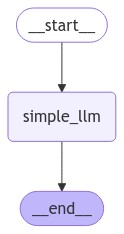

In [ ]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

builder:StateGraph = StateGraph(State)
builder.add_node('simple_llm', simple_llm)
builder.add_edge(START, 'simple_llm')
builder.add_edge('simple_llm', END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
response = graph.invoke({"human_message":"Hi there"})
response

{'human_message': 'Hi there',
 'ai_message': AIMessage(content='Hi there! What can I do for you today? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-1783f561-3d50-45c0-8344-c86b52060723-0', usage_metadata={'input_tokens': 3, 'output_tokens': 12, 'total_tokens': 15})}

In [ ]:
response = graph.invoke({"human_message":"My name is Rehan"})
# response
response['ai_message'].pretty_print()

================================== Ai Message ==================================

Nice to meet you, Rehan! What can I do for you today?


In above example, you can see that human_message and ai_message in state is being overwritten. Keep this thing in mind, we'll discuss it later

## **4. Graph with tool calling LLM**
Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language.

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user.

And, it will return an output that adheres to the tool's schema.

Many LLM providers support tool calling and tool calling interface in LangChain is simple.

You can simply pass any Python function into ChatModel.bind_tools(function).

---



In [ ]:
# Create a function (external tool) to deposit money in bank account

def deposit_money(name: str, bank_account_no: int) -> int:
    """Deposit Money in Bank account.

    Args:
        name: first str
        bank_account_no: second int
    """
    # BUSINESS LOGIC for Bank Deposit

    return {"status": f"Deposit Successfull in {name} Account"}

In [ ]:
# Check with simple llm instance witout tool
response = llm.invoke(f"Deposit Money in Rehan's Account. His acc number is 00123")
response.pretty_print()

================================== Ai Message ==================================

I understand you want to deposit money into Rehan's account, but I need more information to help you. 

Please tell me:

* **How much money do you want to deposit?**
* **What is the name of the bank or financial institution?**
* **What is the currency you are using?**

Once I have this information, I can guide you on how to proceed with the deposit. 

**Important Note:** I am an AI and cannot directly access or manipulate real-world bank accounts. You will need to use the bank's official channels (online banking, mobile app, or visiting a branch) to complete the deposit.


#### **Create LLM instance with tool calling**
To provide access to the external tool (function), we have to inform the llm about the tool. This can be done with simple `bind_tools()` method. You can pass single tool or multiple tools but the tool names should be passed as list of tool/tools name.

In [ ]:
# To provide
llm_with_tools = llm.bind_tools([deposit_money])
print("LLM with tools:", llm_with_tools)
print("LLM without tools:", llm)

LLM with tools: bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), temperature=0.0, max_output_tokens=1000, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7d1df715f7f0>, default_metadata=()) kwargs={'tools': [{'function_declarations': [{'name': 'deposit_money', 'description': 'Deposit Money in Bank account.\n\n    Args:\n        name: first str\n        bank_account_no: second int', 'parameters': {'type_': 6, 'description': 'Deposit Money in Bank account.\n\nArgs:\n    name: first str\n    bank_account_no: second int', 'properties': {'bank_account_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['n

In [ ]:
# Now let's call the function with llm_with_tools
response = llm_with_tools.invoke(f"Deposit Money in Rehan's Account. His acc number is 00123")
response

{'name': 'deposit_money', 'description': 'Deposit Money in Bank account.\n\n    Args:\n        name: first str\n        bank_account_no: second int', 'parameters': {'type_': 6, 'description': 'Deposit Money in Bank account.\n\nArgs:\n    name: first str\n    bank_account_no: second int', 'properties': {'bank_account_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['name', 'bank_account_no'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"name": "Rehan", "bank_account_no": 123.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-44020437-9f33-468c-9e5c-0b51834b82da-0', tool_calls=[{'name': 'deposit_money', 'args': {'name': 'Rehan', 'bank_account_no': 123.0}, 'id': '66fc7c81-7449-4d6f-a6f0-516975680f6b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 97, 'output_tokens': 27, 'total_tokens': 124})

#### **Build the Graph**

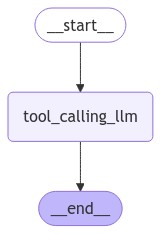

In [ ]:
# Create State
class ToolLLMState(TypedDict):
    messages:list

# Create Node for Tool Calling LLM
def tool_calling_llm(state:ToolLLMState):
    return {"messages":llm_with_tools.invoke(state['messages'])}


# Add Node
builder:StateGraph = StateGraph(ToolLLMState)
builder.add_node('tool_calling_llm', tool_calling_llm)

# Add Edges
builder.add_edge(START, 'tool_calling_llm')
builder.add_edge('tool_calling_llm', END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response = graph.invoke({"messages":[HumanMessage(content="Deposit Money in Rehan's Account. His acc number is 00123")]})
response

{'name': 'deposit_money', 'description': 'Deposit Money in Bank account.\n\n    Args:\n        name: first str\n        bank_account_no: second int', 'parameters': {'type_': 6, 'description': 'Deposit Money in Bank account.\n\nArgs:\n    name: first str\n    bank_account_no: second int', 'properties': {'bank_account_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['name', 'bank_account_no'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


{'messages': AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"bank_account_no": 123.0, "name": "Rehan"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-e88d0ca3-aec5-4a7f-a95d-17a08fae315b-0', tool_calls=[{'name': 'deposit_money', 'args': {'bank_account_no': 123.0, 'name': 'Rehan'}, 'id': 'c9140ba9-61ef-41ed-a049-145eca046dad', 'type': 'tool_call'}], usage_metadata={'input_tokens': 97, 'output_tokens': 27, 'total_tokens': 124})}

**Current Flow**
- **LLM:** Call this Tool
- **System:** Called Tool and told LLM the result.
**Issue:** Where is my Human Message
Right now in response we only have AIMessage

**Solutions:**
- **Proposal 1:** manually Add Messages in call_llm using llm
- **Proposal 2:** Reducer Functions to Keep History Context

## **5. Reducers:**
Earlier, using `TypedDict`, without using any reducer function, we saw that the state updates from nodes were being overriden in the `state` key.

But what if we want to keep the previous messages and add new messages to the `state` key? This is very important for the case of `Chat models` which takes the list of messages. We would also want to keep the history of the chat(messages) to provide context to the LLM(Chat Models).

Reducers are key to understanding how updates from nodes are applied to the State. Each key in the State has its own independent reducer function. If no reducer function is explicitly specified then it is assumed that all updates to that key should override it.

Let's see the below example to understand the concept in detail.

### **Without using Reducer:**

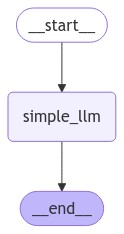

{'messages': AIMessage(content='Where Indus flows, a city grand,\nWith minarets that touch the sand,\nA heart of green, a bustling soul,\nIs Islamabad, where stories roll. \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-117ea12c-b5b5-49bf-a565-47cf928f05a9-0', usage_metadata={'input_tokens': 23, 'output_tokens': 36, 'total_tokens': 59})}


In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

# Create a state
class MessagesState(TypedDict):
    messages: list[AnyMessage]

# Create a Node with simple LLM
def simple_llm(state:MessagesState) -> MessagesState:
    return {"messages":llm.invoke(state['messages'])}

# Create instance of StateGraph and add node and edges
builder:StateGraph = StateGraph(MessagesState)
builder.add_node('simple_llm', simple_llm)
builder.add_edge(START, 'simple_llm')
builder.add_edge('simple_llm', END)

# Compile the Graph
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

# Invoke the graph with messages
messages:list[AnyMessage] = [SystemMessage(content="You're a great poet who answers to any question in poetic style.")]
messages.append(HumanMessage(content="What is the capital of Pakistan."))
response = graph.invoke({"messages":messages})
print(response)

In [ ]:
response['messages'].pretty_print()

================================== Ai Message ==================================

Where Indus flows, a city grand,
With minarets that touch the sand,
A heart of green, a bustling soul,
Is Islamabad, where stories roll.


### **Now let's test by adding reducer `add_messages`:**

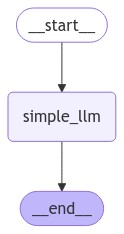

{'messages': [SystemMessage(content="You're a great poet who answers to any question in poetic style.", additional_kwargs={}, response_metadata={}, id='3d15754a-9e65-474c-8f76-fa6e7692fa8c'), HumanMessage(content='What is the capital of Pakistan.', additional_kwargs={}, response_metadata={}, id='02643162-b168-49f7-85bb-9cd16197745e'), AIMessage(content='Where Indus flows, a city grand,\nWith minarets that touch the sand,\nA heart of green, a bustling soul,\nIs Islamabad, where stories roll. \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

# Create a state
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

# Create a Node with simple LLM
def simple_llm(state:MessagesState) -> MessagesState:
    return {"messages":llm.invoke(state['messages'])}

# Create instance of StateGraph and add node and edges
builder:StateGraph = StateGraph(MessagesState)
builder.add_node('simple_llm', simple_llm)
builder.add_edge(START, 'simple_llm')
builder.add_edge('simple_llm', END)

# Compile the Graph
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

# Invoke the graph with messages
messages:list[AnyMessage] = [SystemMessage(content="You're a great poet who answers to any question in poetic style.")]
messages.append(HumanMessage(content="What is the capital of Pakistan."))
response = graph.invoke({"messages":messages})
print(response)
# response['messages'].pretty_print() # wont' work since we have list of messages now.

In [ ]:
for m in response['messages']:
    m.pretty_print()

================================ System Message ================================

You're a great poet who answers to any question in poetic style.
================================ Human Message =================================

What is the capital of Pakistan.
================================== Ai Message ==================================

Where Indus flows, a city grand,
With minarets that touch the sand,
A heart of green, a bustling soul,
Is Islamabad, where stories roll.


### **Explanation of Reducer `add_messages`:**

In [ ]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
messages = add_messages(initial_messages , new_message)
print(messages)
for m in messages:
    m.pretty_print()

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='05fadd87-bc8e-4923-aa3d-96c13f62e995'), HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='7d2075d1-1676-476b-84ca-0549096c35ce'), AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='317970c2-f360-4291-bdf6-e47781750c01')]
================================== Ai Message ==================================
Name: Model

Hello! How can I assist you?
================================ Human Message =================================
Name: Lance

I'm looking for information on marine biology.
================================== Ai Message ==================================
Name: Model

Sure, I can help with that. What specifically are you interested in?


### **MessagesState:**
Since having a list of messages in graph state is so common, LangGraph has a pre-built `MessagesState`.

In [ ]:
from langgraph.graph import MessagesState

class OurMessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built
    pass

# Todo: Use MessagesState in previous example and crate a graph.

## **6. Router:**

### Review

We built a graph that uses `messages` as state and a chat model with bound tools.

We saw that the graph can:

* Return a tool call
* Return a natural language response

### Goals

We can think of this as a router, where the chat model routes between a direct response or a tool call based upon the user input.

This is an simple example of an agent, where the LLM is directing the control flow either by calling a tool or just responding directly.

![Screenshot 2024-08-21 at 9.24.09 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbac6543c3d4df239a4ed1_router1.png)

Let's extend our graph to work with either output!

For this, we can use two ideas:

(1) Add a node that will call our tool.

(2) Add a conditional edge that will look at the chat model model output, and route to our tool calling node or simply end if no tool call is performed.

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import MessagesState

In [ ]:
# Create a State
class RouterState(MessagesState):
    pass

In [ ]:
from google.colab import userdata
google_api_key = userdata.get("GEMINI_API_KEY")

In [ ]:
# Create Instance of LLM

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key=google_api_key
)

In [ ]:
# Create a multiply function (For Tool Call)
def multiply(a:int, b:int) -> int:
    """Multiply two integers"""
    return a * b

In [ ]:
llm_with_tools = llm.bind_tools([multiply])

In [ ]:
# Create a Node: tool_calling_llm
def tool_calling_llm(state:RouterState):
    return {"messages":llm_with_tools.invoke(state['messages'])}

### **`ToolNode` and `tool_condition` Explanation:**
1. **ToolNode:**
A node that runs the tools called in the last AIMessage.
It can be used either in StateGraph with a "messages" key or in MessageGraph. If multiple tool calls are requested, they will be run in parallel. The output will be a list of ToolMessages, one for each tool call.
    - The state MUST contain a list of messages.
    - The last message MUST be an AIMessage.
    - The AIMessage MUST have tool_calls populated.

2. **tool_condition:** It is a function which is used in the conditional_edge to route to the ToolNode if the last message has tool calls. Otherwise, route to the end.
    - **Parameters:**
`state(Union[list[AnyMessage], dict[str, Any], BaseModel])`
The state to check for tool calls. Must have a list of messages (MessageGraph) or have the "messages" key (StateGraph).

    - **Returns:**
`Literal['tools', '__end__']`
The next node to route to.

In [ ]:
# Build the graph
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import tools_condition, ToolNode
from langgraph.graph.state import CompiledStateGraph

builder:StateGraph = StateGraph(RouterState)
builder.add_node('tool_calling_llm', tool_calling_llm)

# We use the built-in ToolNode and simply pass a list of our tools to initialize it.
builder.add_node('tools', ToolNode([multiply]))

builder.add_edge(START, 'tool_calling_llm')

# We use the built-in tools_condition as our conditional edge.
# If the lastes message(result) from the assistant is tool call -> tool_condition routes to tools.
# If the lastes message(result) from the assistant is not a tool call -> tool_condition routes to END.
builder.add_conditional_edges('tool_calling_llm', tools_condition )

builder.add_edge('tools', END)

graph: CompiledStateGraph = builder.compile()

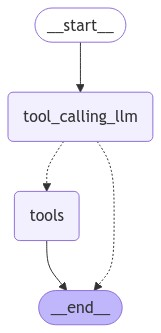

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

### **Invoke Graph with Tool Call**
LLM with tool node will decide itselt to call the tool or respond to general query depending upon the user prompt. Let's first test it for tool call.

In [ ]:
from langchain_core.messages import HumanMessage
from pprint import pprint

messages = [HumanMessage(content="What is 2 times 7?")]
response = graph.invoke({"messages":messages})

# print(response)

for m in response['messages']:
    m.pretty_print()


{'name': 'multiply', 'description': 'Multiply two integers', 'parameters': {'type_': 6, 'description': 'Multiply two integers', 'properties': {'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
================================ Human Message =================================

What is 2 times 7?
================================== Ai Message ==================================
Tool Calls:
  multiply (63c32453-f10c-4e5f-86f5-46781674028e)
 Call ID: 63c32453-f10c-4e5f-86f5-46781674028e
  Args:
    b: 7.0
    a: 2.0
================================= Tool Message =================================
Name: multiply

14


### **Call LLM General Query**

In [ ]:
from langchain_core.messages import HumanMessage
from pprint import pprint

messages = [HumanMessage(content="What is generative AI")]
response = graph.invoke({"messages":messages})

# print(response)

for m in response['messages']:
    m.pretty_print()

{'name': 'multiply', 'description': 'Multiply two integers', 'parameters': {'type_': 6, 'description': 'Multiply two integers', 'properties': {'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
================================ Human Message =================================

What is generative AI
================================== Ai Message ==================================

Generative AI is a type of artificial intelligence that focuses on creating new content, such as text, images, audio, video, code, and more. It learns patterns from existing data and uses those patterns to generate new, original outputs. 

Here are some k